In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime
import matplotlib
import matplotlib.pyplot as plt
import sklearn

import pickle
import joblib

In [2]:
df = pd.read_csv("VehicleJID_reused00400001.csv", low_memory=False)

In [3]:
df.sort_values(['Seconds'], ascending=[0])

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day
4145,626318,1353347605000000,40.0,400001,5729,0,-158,4715,1,2012-11-19 17:53:25,6497.0,0
1734,310059,1352738249000000,40.0,400001,6340,0,117,4715,1,2012-11-12 16:37:29,6486.0,0
3712,613869,1353339918000000,40.0,400001,5766,0,339,4715,1,2012-11-19 15:45:18,6450.0,0
501,278931,1352712486000000,40.0,400001,6325,0,405,4411,1,2012-11-12 09:28:06,6423.0,0
3909,619238,1353343280000000,40.0,400001,5727,0,-280,4715,1,2012-11-19 16:41:20,6375.0,0
547,280016,1352713286000000,40.0,400001,6336,0,675,4796,1,2012-11-12 09:41:26,6374.0,0
496,278844,1352712424000000,40.0,400001,6325,0,437,4796,1,2012-11-12 09:27:04,6361.0,0
4264,630177,1353349886000000,40.0,400001,5795,0,-216,4715,1,2012-11-19 18:31:26,6351.0,0
6000,963257,1353949593000000,40.0,400001,5723,0,0,4715,1,2012-11-26 17:06:33,6347.0,0
6160,967825,1353952415000000,40.0,400001,5768,0,109,4796,1,2012-11-26 17:53:35,6346.0,0


In [4]:
df.describe()

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Seconds,Day
count,6276.000000,6.276000e+03,6276.0,6276.0,6276.000000,6276.0,6276.000000,6276.000000,6276.0,6276.000000,6276.0
mean,606899.765456,1.353320e+15,40.0,400001.0,5960.941045,0.0,-291.734544,2247.435468,1.0,2551.212556,0.0
std,261963.258246,4.868424e+11,0.0,0.0,314.374007,0.0,336.353507,1526.400836,0.0,1677.287293,0.0
min,264962.000000,1.352703e+15,40.0,400001.0,5640.000000,0.0,-2007.000000,49.000000,1.0,0.000000,0.0
25%,306269.500000,1.352736e+15,40.0,400001.0,5719.000000,0.0,-450.000000,1535.000000,1.0,1005.000000,0.0
50%,600185.000000,1.353329e+15,40.0,400001.0,5788.000000,0.0,-277.000000,1941.000000,1.0,2431.500000,0.0
75%,926263.000000,1.353921e+15,40.0,400001.0,6357.000000,0.0,-87.000000,2673.000000,1.0,3963.500000,0.0
max,972260.000000,1.353971e+15,40.0,400001.0,6493.000000,0.0,1346.000000,7473.000000,1.0,6497.000000,0.0


In [5]:
df['Hour']= df['Date']
df['Date'] = pd.to_datetime(df['Timestamp'], unit='us')

for iter in range (len(df)):
    df.iloc[iter,12]=df.iloc[iter, 9].hour

In [6]:
df['Hour'] = df['Hour'].astype('category')
df['Day'] = df['Day'].astype('category')
df['LineID'] = df['LineID'].astype('category')
df['JourneyPatternID'] = df['JourneyPatternID'].astype('category')

In [7]:
features = ['Hour' , 'Day', 'StopID' ]

X = pd.concat([df[features]], axis=1)
y = df.Seconds

X

,Hour,Day,StopID
0,6,0,1524
1,6,0,261
2,6,0,2655
3,6,0,1533
4,6,0,1525
5,6,0,1526
6,6,0,1534
7,6,0,270
8,7,0,4937
9,7,0,1586


In [8]:
SVC=  sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [9]:
SVC.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
rfc_predictions = SVC.predict(X)

In [11]:
print("The value of R^2", metrics.r2_score(y, rfc_predictions))

The value of R^2 0.10765770877


In [12]:
true_v_pred = pd.DataFrame({'Actual Value': y, 'Predicted Value': rfc_predictions})
true_v_pred

,Actual Value,Predicted Value
0,0.0,1833.903329
1,0.0,1447.779520
2,0.0,2179.672156
3,0.0,1836.654805
4,39.0,1834.209049
5,81.0,1834.514768
6,62.0,1836.960525
7,96.0,1450.530996
8,0.0,2954.069326
9,220.0,1929.603068


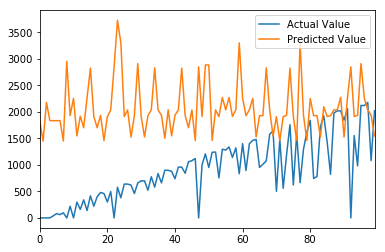

In [13]:
true_v_pred.head(100).plot()